## Практикуемся решать задачу регрессии!

### Будем предсказывать цену дома 📝

ВАЖНО: При построении графиков не забывайте указать название графика и обозначить, что изображено по каждой из осей

В блоке ниже импортируйте все библиотеки, которые вам понадобятся для запуска ноутбука

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# some lib

**Скачайте необходимые данные по ссылке: https://www.kaggle.com/c/house-prices-advanced-regression-techniques**

In [ ]:
data = pd.read_csv('train.csv', header=0)

✅ Посмотрите, как выглядят данные, и приступайте к анализу

In [ ]:
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.shape

(1460, 81)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

✅ Если в данных бессмысленные столбцы? Если да, избавьтесь от них и объясните, почему так поступили.

In [ ]:
n = data.isna().sum()
n = n[n>0]
n

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [ ]:
data = data.drop(['MiscFeature','PoolQC','Alley','BsmtExposure','BsmtFinType1',
           'BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF', 'Id'],
           axis = 1 )

✅ Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [ ]:
data.shape

(1460, 71)

In [ ]:
data.isnull().any().any()

True

In [ ]:
data.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
propuski =  data.isnull().sum()
propuski = propuski[propuski>0]
procent = propuski/len(data)
print("Количество пропусков в каждом столбце:")
print(propuski)
print("Доля от общего числа значений:")
print(procent)

Количество пропусков в каждом столбце:
LotFrontage      259
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1179
dtype: int64
Доля от общего числа значений:
LotFrontage     0.177397
MasVnrType      0.597260
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
Fence           0.807534
dtype: float64


✅ Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение.

In [ ]:
for col in data:
  if data[col].isnull().sum() >0:
    print(f"{col} : {data[col].dtype}")

LotFrontage : float64
MasVnrType : object
MasVnrArea : float64
BsmtQual : object
BsmtCond : object
Electrical : object
FireplaceQu : object
GarageType : object
GarageYrBlt : float64
GarageFinish : object
GarageQual : object
GarageCond : object
Fence : object


In [ ]:
fl_col = data.select_dtypes('float64').columns
fl_col

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [ ]:
obj_col = data.select_dtypes('object').columns
obj_col

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
for col in obj_col:
  #top = data[col].mode()[0]
  top_obj = data[col].describe()["top"]
  data[col] = data[col].fillna(top_obj)

In [ ]:
for col in fl_col:
  mean_fl = data[col].mean()
  data[col] = data[col].fillna(mean_fl)

✅ Проверьте, что вы действительно избавились от пропусков

In [ ]:
data.isnull().any().any()

False

✅ Обработайте категориальные признаки. Объясните выбор метода (one-hot-encoding, label encoding, ...)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
data_coded = data.copy()

In [ ]:
data_label =[]
data_ohc= []


for col in obj_col:
  if (data_coded[col].nunique() == 2):
    data_label.append(col)
  else:
    data_ohc.append(col)

In [ ]:
le = LabelEncoder()
for col in data_label:
  data_coded[col]  = le.fit_transform(data_coded[col])

In [ ]:
data_coded = pd.get_dummies(data_coded,columns=data_ohc,drop_first=True, dtype = int)

In [ ]:
data_coded

,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,1,0,7,5,2003,2003,196.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,1,0,6,8,1976,1976,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,1,0,7,5,2001,2002,162.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,1,0,7,5,1915,1970,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,1,0,8,5,2000,2000,350.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,1,0,6,5,1999,2000,0.0,...,0,0,0,0,1,0,0,0,1,0
1456,20,85.0,13175,1,0,6,6,1978,1988,119.0,...,0,0,0,0,1,0,0,0,1,0
1457,70,66.0,9042,1,0,7,9,1941,2006,0.0,...,0,0,0,0,1,0,0,0,1,0
1458,20,68.0,9717,1,0,5,6,1950,1996,0.0,...,0,0,0,0,1,0,0,0,1,0


✅ Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

In [ ]:
data_corr = data.drop(labels= obj_col, axis =1)


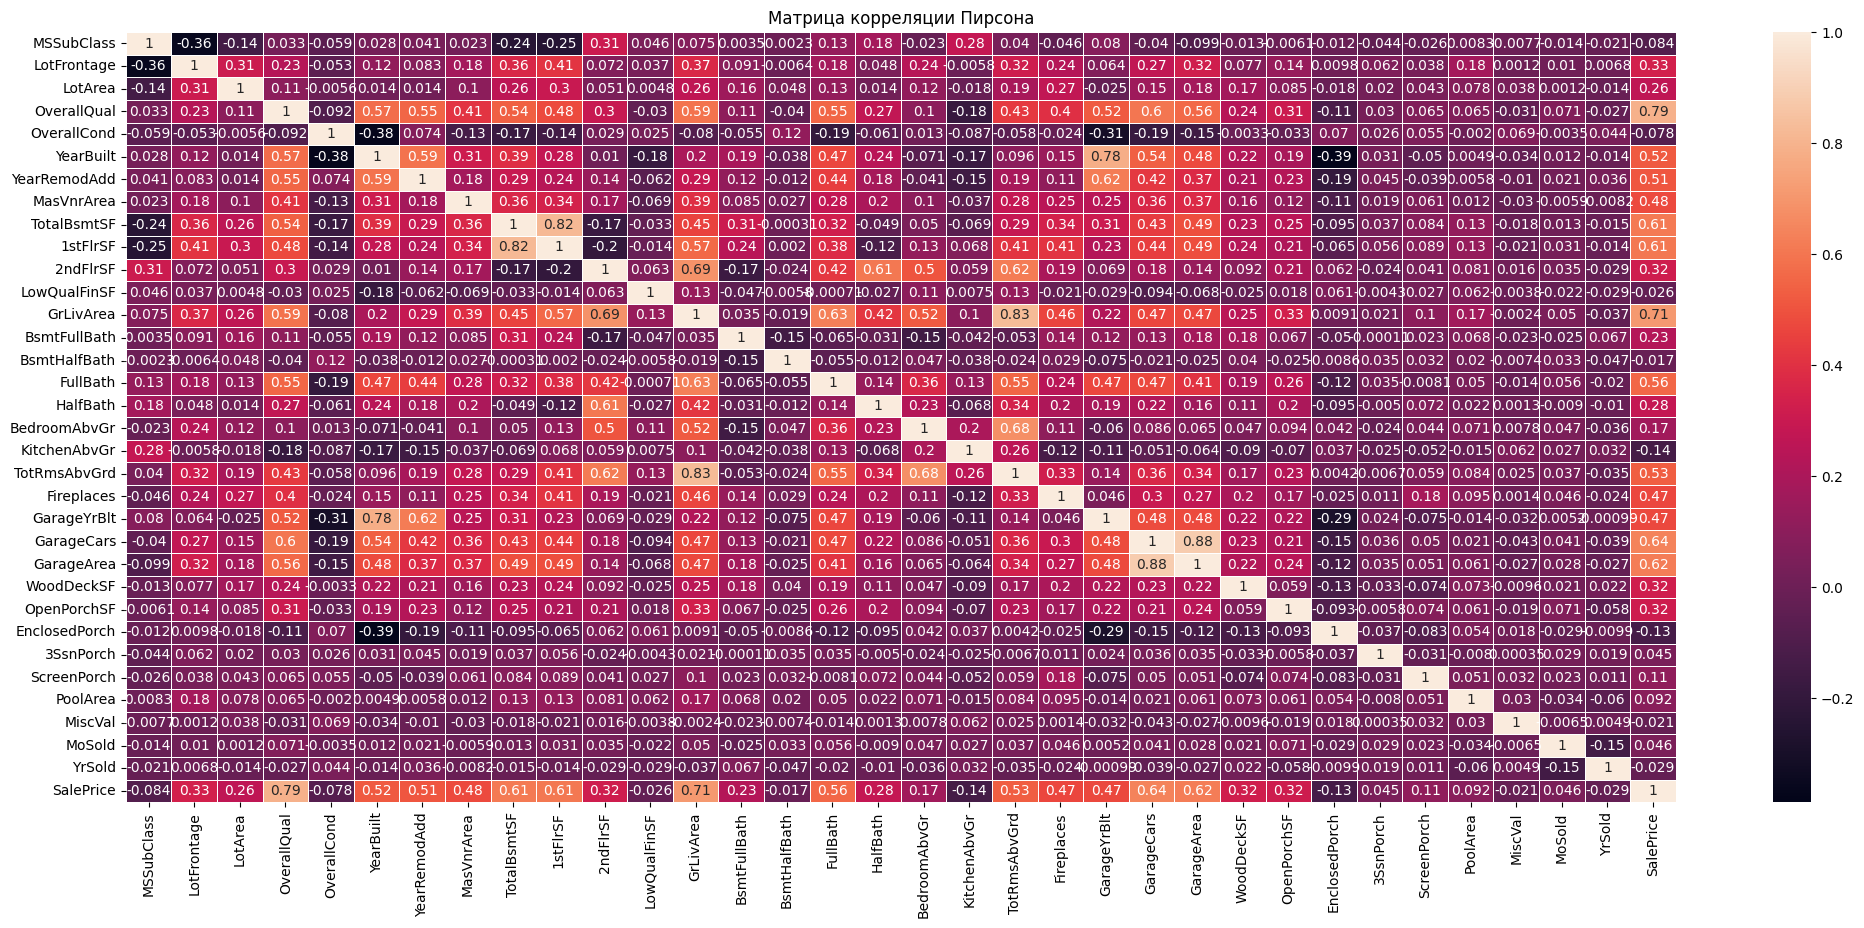

In [ ]:
# Визуализируем матрицу корреляции с помощью heatmap
plt.figure(figsize=(25, 10))  # Задаем размер графика
sns.heatmap(data_corr.corr(), annot=True, linewidths=.5) # Рисуем heatmap
plt.title('Матрица корреляции Пирсона') # Добавляем заголовок
plt.show() # Показываем график

✅ Найдите признаки с максимальным и минимальным абсолютным значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

In [ ]:
data_corr = data_corr.corr()
data_corr = data_corr.abs()

In [ ]:
sol = (data_corr.where(np.triu(np.ones(data_corr.shape), k= 1).astype(bool))
                        .stack().sort_values(ascending=False))
sol

,,0
GarageCars,GarageArea,0.882475
GrLivArea,TotRmsAbvGrd,0.825489
TotalBsmtSF,1stFlrSF,0.819530
OverallQual,SalePrice,0.790982
YearBuilt,GarageYrBlt,0.780555
...,...,...
GarageYrBlt,YrSold,0.000987
LowQualFinSF,FullBath,0.000710
3SsnPorch,MiscVal,0.000354
TotalBsmtSF,BsmtHalfBath,0.000315


In [ ]:
feat = []
v = []

for it,val in sol.items():
  if (it[1] == 'SalePrice'):
    print(it[0],':', val)
    feat.append(it[0])
    v.append(val)

OverallQual : 0.7909816005838053
GrLivArea : 0.7086244776126515
GarageCars : 0.6404091972583519
GarageArea : 0.6234314389183622
TotalBsmtSF : 0.6135805515591943
1stFlrSF : 0.6058521846919153
FullBath : 0.5606637627484453
TotRmsAbvGrd : 0.5337231555820284
YearBuilt : 0.5228973328794967
YearRemodAdd : 0.5071009671113866
MasVnrArea : 0.475241316773666
GarageYrBlt : 0.47017745374048125
Fireplaces : 0.46692883675152763
LotFrontage : 0.3349008515405512
WoodDeckSF : 0.32441344456812926
2ndFlrSF : 0.31933380283206736
OpenPorchSF : 0.31585622711605504
HalfBath : 0.28410767559478256
LotArea : 0.2638433538714051
BsmtFullBath : 0.22712223313149427
BedroomAbvGr : 0.16821315430073963
KitchenAbvGr : 0.13590737084214105
EnclosedPorch : 0.1285779579259566
ScreenPorch : 0.11144657114291112
PoolArea : 0.09240354949187318
MSSubClass : 0.08428413512659509
OverallCond : 0.07785589404867797
MoSold : 0.046432245223819446
3SsnPorch : 0.04458366533574838
YrSold : 0.028922585168736813
LowQualFinSF : 0.0256061300

In [ ]:
data_corr_frame  = pd.DataFrame(v, index=feat, columns= ['SalePrice'] )
data_corr_frame

,SalePrice
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897
YearRemodAdd,0.507101


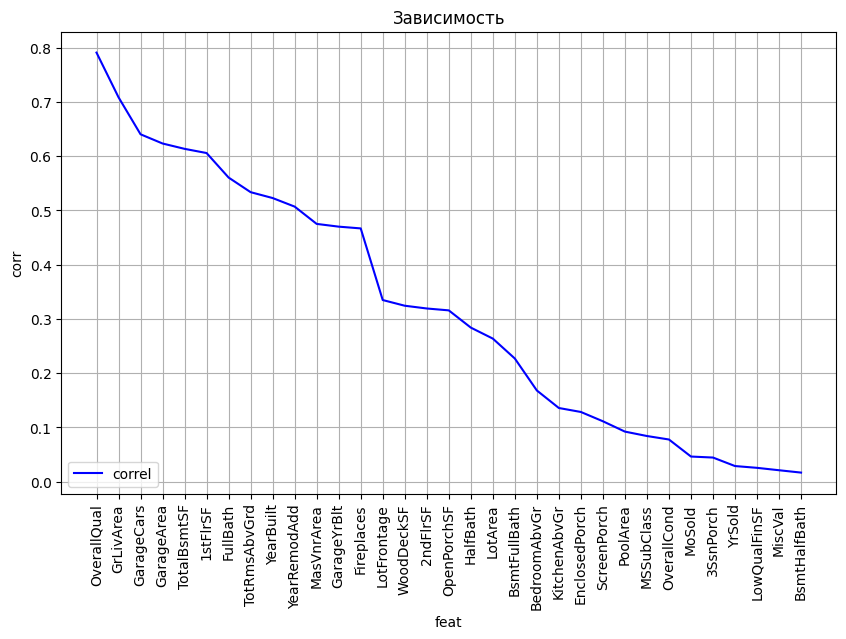

In [ ]:
x = feat
y = v
plt.figure(figsize = (10,6))
plt.plot(x,y,color = 'blue', label = 'correl')
plt.xlabel('feat')
plt.ylabel('corr')
plt.title('Зависимость')
plt.xticks(rotation=90)
plt.legend(fontsize=10,loc='lower left')
plt.grid()
plt.show()

✅ Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также "смещения" распределения переменной в сторону нормального, можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить).

Подсказка: воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

ВАЖНО: далее используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.

In [ ]:
X = data_coded.drop('SalePrice', axis = 1)

In [ ]:
y = data_coded['SalePrice']

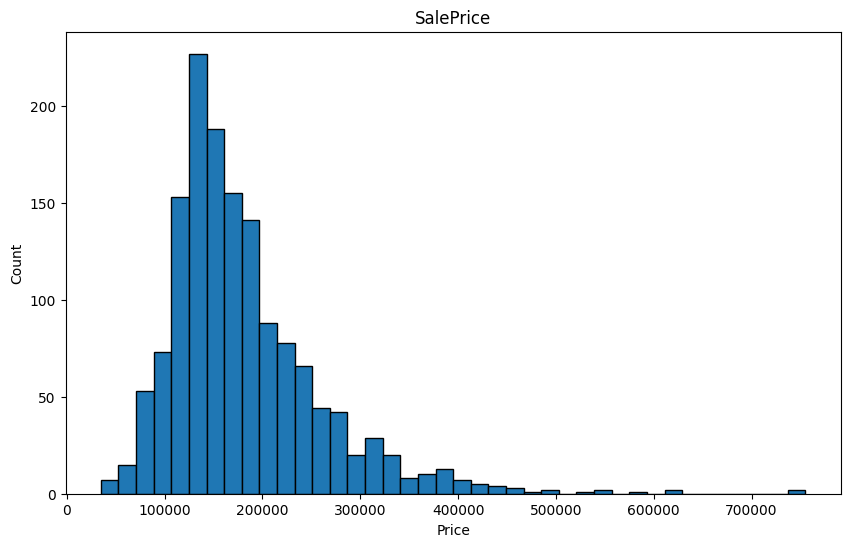

In [ ]:
plt.figure(figsize = (10,6))
plt.hist(y,edgecolor = 'black', bins = 40)
plt.title('SalePrice')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

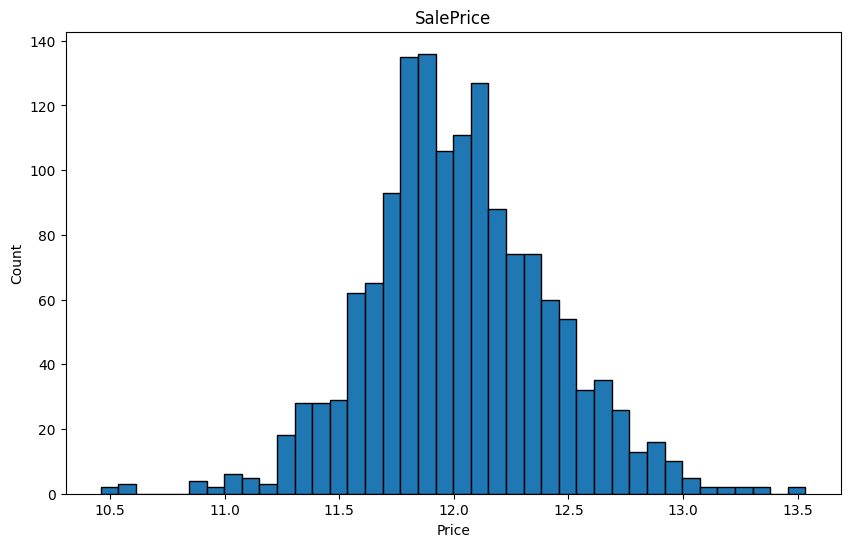

In [ ]:
plt.figure(figsize = (10,6))
plt.hist(np.log1p(y),edgecolor = 'black', bins = 40)
plt.title('SalePrice')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

✅ Разбейте выборку на обучающую и тестовую в отношении 75:25. Зафиксируйте при разбиении значение `random_state` = 13. Не забывайте прологорифмировать целевую переменную (как в предыдущем задании)

In [ ]:
np.random.seed(13)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train,y_test = train_test_split(X, np.log1p(y), test_size = 0.3)

✅ Примените к данным

- Линейную регрессию
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрикам
- RMSE
- MAE
- $R^2$

Опишите полученные результаты.

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

# **Линейная регрессия**

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
print("lin_reg MSE train: ", mean_squared_error(np.expm1(y_train) ,np.expm1(lin_reg.predict(X_train))))
print("lin_reg MSE test: ", mean_squared_error(np.expm1(y_test),np.expm1(lin_reg.predict(x_test))))

lin_reg MSE train:  247009116.34779903
lin_reg MSE test:  13775988121.125275


In [ ]:
import math
print("lin_reg MSE train: ", mean_squared_error(math.e**(y_train)-1, math.e**(lin_reg.predict(X_train))-1))
print("lin_reg MSE test: ", mean_squared_error(math.e**(y_test)-1, math.e**(lin_reg.predict(x_test))-1))

lin_reg MSE train:  247009116.34779873
lin_reg MSE test:  13775988121.125252


In [ ]:
print("lin_reg MAE train: ", mean_absolute_error(np.expm1(y_train) ,np.expm1(lin_reg.predict(X_train))))
print("lin_reg MAE test: ", mean_absolute_error(np.expm1(y_test),np.expm1(lin_reg.predict(x_test))))

lin_reg MAE train:  10908.432197148848
lin_reg MAE test:  24027.36768530106


In [ ]:
print("lin_reg r2_score train: ", r2_score(np.expm1(y_train) ,np.expm1(lin_reg.predict(X_train))))
print("lin_reg r2_score test: ", r2_score(np.expm1(y_test),np.expm1(lin_reg.predict(x_test))))

lin_reg r2_score train:  0.9582160512936622
lin_reg r2_score test:  -0.9144773013950243


In [ ]:
coef_df = pd.DataFrame(lin_reg.coef_,index=X.columns, columns= ['coef'])
coef_df.sort_values(by = ['coef'])
coef_df

,coef
MSSubClass,-0.000382
LotFrontage,0.000444
LotArea,0.000003
Street,0.100777
Utilities,-0.195850
...,...
SaleCondition_AdjLand,0.046416
SaleCondition_Alloca,-0.001783
SaleCondition_Family,0.016700
SaleCondition_Normal,0.062618


# **Lasso**

In [ ]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [ ]:
print("laaso MSE train: ", mean_squared_error(np.expm1(y_train) ,np.expm1(lasso.predict(X_train))))
print("lasso MSE test: ", mean_squared_error(np.expm1(y_test),np.expm1(lasso.predict(x_test))))

laaso MSE train:  365661254.1401969
lasso MSE test:  19267513217.75095


In [ ]:
print("laaso MSE train: ", mean_absolute_error(np.expm1(y_train), np.expm1(lasso.predict(X_train))))
print("laaso MSE test: ", mean_absolute_error(np.expm1(y_test), np.expm1(lasso.predict(x_test))))

laaso MSE train:  13141.332559379207
laaso MSE test:  24101.05354246192


In [ ]:
print("laaso r2_score train: ", r2_score(np.expm1(y_train), np.expm1(lasso.predict(X_train))))
print("laaso r2_score test: ", r2_score(np.expm1(y_test), np.expm1(lasso.predict(x_test))))

laaso r2_score train:  0.9381449101442231
laaso r2_score test:  -1.677645798281925


In [ ]:
coef_lasso = pd.DataFrame(lasso.coef_, index=X.columns, columns=['coef_lasso'])
coef_lasso = coef_lasso.sort_values(by= ['coef_lasso'])
coef_lasso

,coef_lasso
BldgType_Twnhs,-0.024620
HouseStyle_1Story,-0.022235
BsmtQual_Gd,-0.017730
Neighborhood_NWAmes,-0.017156
HeatingQC_TA,-0.016632
...,...
MSZoning_RL,0.057967
BsmtFullBath,0.059737
SaleCondition_Normal,0.066413
SaleType_New,0.111583


# **Ridge**

In [ ]:
ridge = linear_model.Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
print("Ridge MAE test", mean_absolute_error(np.expm1(y_train), np.expm1(ridge.predict(X_train))))
print("Ridge MAE train",mean_absolute_error(np.expm1(y_test),np.expm1(ridge.predict(x_test))))

Ridge MAE test 10977.583345011588
Ridge MAE train 23953.707813834764


In [ ]:
print("Ridge MSE test", mean_squared_error(np.expm1(y_train), np.expm1(ridge.predict(X_train))))
print("Ridge MSE train",mean_squared_error(np.expm1(y_test),np.expm1(ridge.predict(x_test))))

Ridge MSE test 247502135.13492322
Ridge MSE train 13736095730.050545


In [ ]:
print("Ridge r2_score test", r2_score(np.expm1(y_train), np.expm1(ridge.predict(X_train))))
print("Ridge r2_score train",r2_score(np.expm1(y_test),np.expm1(ridge.predict(x_test))))

Ridge r2_score test 0.9581326524620034
Ridge r2_score train -0.9089333740527943


In [ ]:
coef_ridge = pd.DataFrame(ridge.coef_,index=X.columns,columns= ['ridge_coef'])
coef_ridge = coef_ridge.sort_values(by = ['ridge_coef'])
coef_ridge

,ridge_coef
Exterior1st_BrkComm,-0.413505
LandSlope_Sev,-0.275760
GarageQual_Po,-0.246813
Electrical_Mix,-0.206800
Functional_Maj2,-0.198430
...,...
MSZoning_RH,0.255446
MSZoning_RM,0.261019
MSZoning_RL,0.296826
MSZoning_FV,0.301262


# **CV**

In [104]:
alphas = [0.00001, 0.0001, 0.0003, 0.0005, 0.001, 0.01, 0.5, 1, 2, 6]
lasso_euclid = []
ridge_euclid = []
print("Lasso Euclidean norms:")
print()
for i in alphas:
  lasso1 = linear_model.Lasso(alpha= i)
  lasso1.fit(X_train,y_train)
  lasso_euclid.append(np.linalg.norm(lasso1.coef_))
print(lasso_euclid)

Lasso Euclidean norms:



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.757e+00, tolerance: 1.591e-02
  model = cd_fast.enet_coordinate_descent(


1.4700119095833601


In [105]:
print("Ridge Euclidean norms:")
print()
for i in alphas:
  ridge1 = linear_model.Ridge(alpha=i)
  ridge1.fit(X_train,y_train)
  ridge_euclid.append(np.linalg.norm(ridge1.coef_))

print(ridge_euclid)

Ridge Euclidean norms:



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=8.92616e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[1.6413998793829245, 1.6409129616558744, 1.63983359512725, 1.638757894758521, 1.6360845202105465, 1.5914603736553197, 0.9248106970416949, 0.7443959885697015, 0.5881210661950708, 0.39960583590550836]


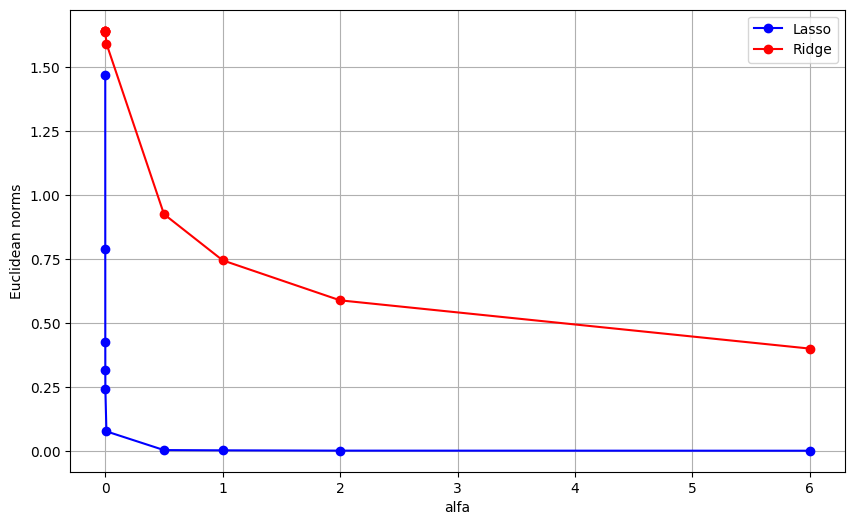

In [107]:
x = alphas
plt.figure(figsize = (10,6))
y1 = lasso_euclid
y2 = ridge_euclid

#Lasso
plt.plot(x, y1, color = 'blue', marker = 'o', label = 'Lasso')

#Ridge
plt.plot(x, y2, color = 'red', marker = 'o', label = 'Ridge')

plt.grid(True)
plt.xlabel('alfa')
plt.ylabel('Euclidean norms')
plt.legend()
plt.show()

In [108]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [114]:
# LassoCV
lasso_cv = LassoCV(cv=5, alphas = [0.00001, 0.0001,0.0003, 0.0005, 0.001, 0.01, 0.5, 1, 2, 6], random_state=0).fit(X_train,y_train)
best_lasso = lasso_cv.alpha_
print("Оптимальное alpha для Lasso:", lasso_cv.alpha_)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4084037283814523, tolerance: 0.013360610397014716
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0010080779960107, tolerance: 0.012873978400706776
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.42313212430873737, tolerance: 0.012873978400706776
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: C

Оптимальное alpha для Lasso: 0.0003


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07345913422508055, tolerance: 0.01223205656947104
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.822324614991185, tolerance: 0.01223205656947104
  model = cd_fast.enet_coordinate_descent_gram(


In [116]:
lasso_cv = linear_model.Lasso(alpha = best_lasso)
lasso_cv.fit(X_train, y_train)
print("laaso cv MSE train: ", mean_squared_error(np.expm1(y_train) ,np.expm1(lasso_cv.predict(X_train))))
print("lasso cv MSE test: ", mean_squared_error(np.expm1(y_test),np.expm1(lasso_cv.predict(x_test))))

laaso cv MSE train:  294996676.2863122
lasso cv MSE test:  16932423740.112505


In [118]:
coef_lasso_cv = pd.DataFrame(lasso_cv.coef_, index=X.columns, columns=['coef_lasso'])
coef_lasso_cv = coef_lasso_cv.sort_values(by= ['coef_lasso'])
coef_lasso_cv

,coef_lasso
Exterior1st_BrkComm,-0.141067
LandSlope_Sev,-0.110037
Functional_Maj2,-0.089057
Neighborhood_MeadowV,-0.076380
BsmtQual_TA,-0.052780
...,...
SaleCondition_Normal,0.076329
Neighborhood_StoneBr,0.110616
SaleType_New,0.112004
Neighborhood_Crawfor,0.127821


In [115]:
# RidgeCV
ridge_cv = RidgeCV(cv = 5, alphas = [1, 2, 5, 10, 20, 30]).fit(X_train, y_train)
best_ridge = ridge_cv.alpha_
print("Оптимальное alpha для Ridge:", ridge_cv.alpha_)

Оптимальное alpha для Ridge: 10


In [119]:
Ridge_cv = linear_model.Ridge(alpha = best_ridge)
Ridge_cv.fit(X_train, y_train)
print("Ridge cv MSE train: ", mean_squared_error(np.expm1(y_train) ,np.expm1(Ridge_cv.predict(X_train))))
print("Ridge cv MSE test: ", mean_squared_error(np.expm1(y_test),np.expm1(Ridge_cv.predict(x_test))))

Ridge cv MSE train:  302698980.32639474
Ridge cv MSE test:  16230860774.02471


In [120]:
coef_ridge_cv = pd.DataFrame(Ridge_cv.coef_, index=X.columns, columns=['coef_lasso'])
coef_ridge_cv = coef_ridge_cv.sort_values(by= ['coef_lasso'])
coef_ridge_cv

,coef_lasso
Neighborhood_MeadowV,-0.054581
LandSlope_Sev,-0.054393
Functional_Maj2,-0.044461
KitchenQual_Fa,-0.041894
BsmtQual_TA,-0.041227
...,...
BsmtFullBath,0.063455
Functional_Typ,0.065595
SaleCondition_Normal,0.069745
Neighborhood_StoneBr,0.071403


In [ ]:
# # LassoCV
# lasso_cv = linear_model.LassoCV(cv=5, alphas=np.logspace(-6, 2, 100), random_state=42)  # alphas - диапазон значений alpha
# lasso_cv.fit(X_train, y_train)
# print("Оптимальное alpha для Lasso:", lasso_cv.alpha_)

# # RidgeCV
# ridge_cv = linear_model.RidgeCV(cv=5, alphas=np.logspace(-6, 2, 100))
# ridge_cv.fit(X_train, y_train)
# print("Оптимальное alpha для Ridge:", ridge_cv.alpha_)

✅ Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения, проанализируйте результаты.

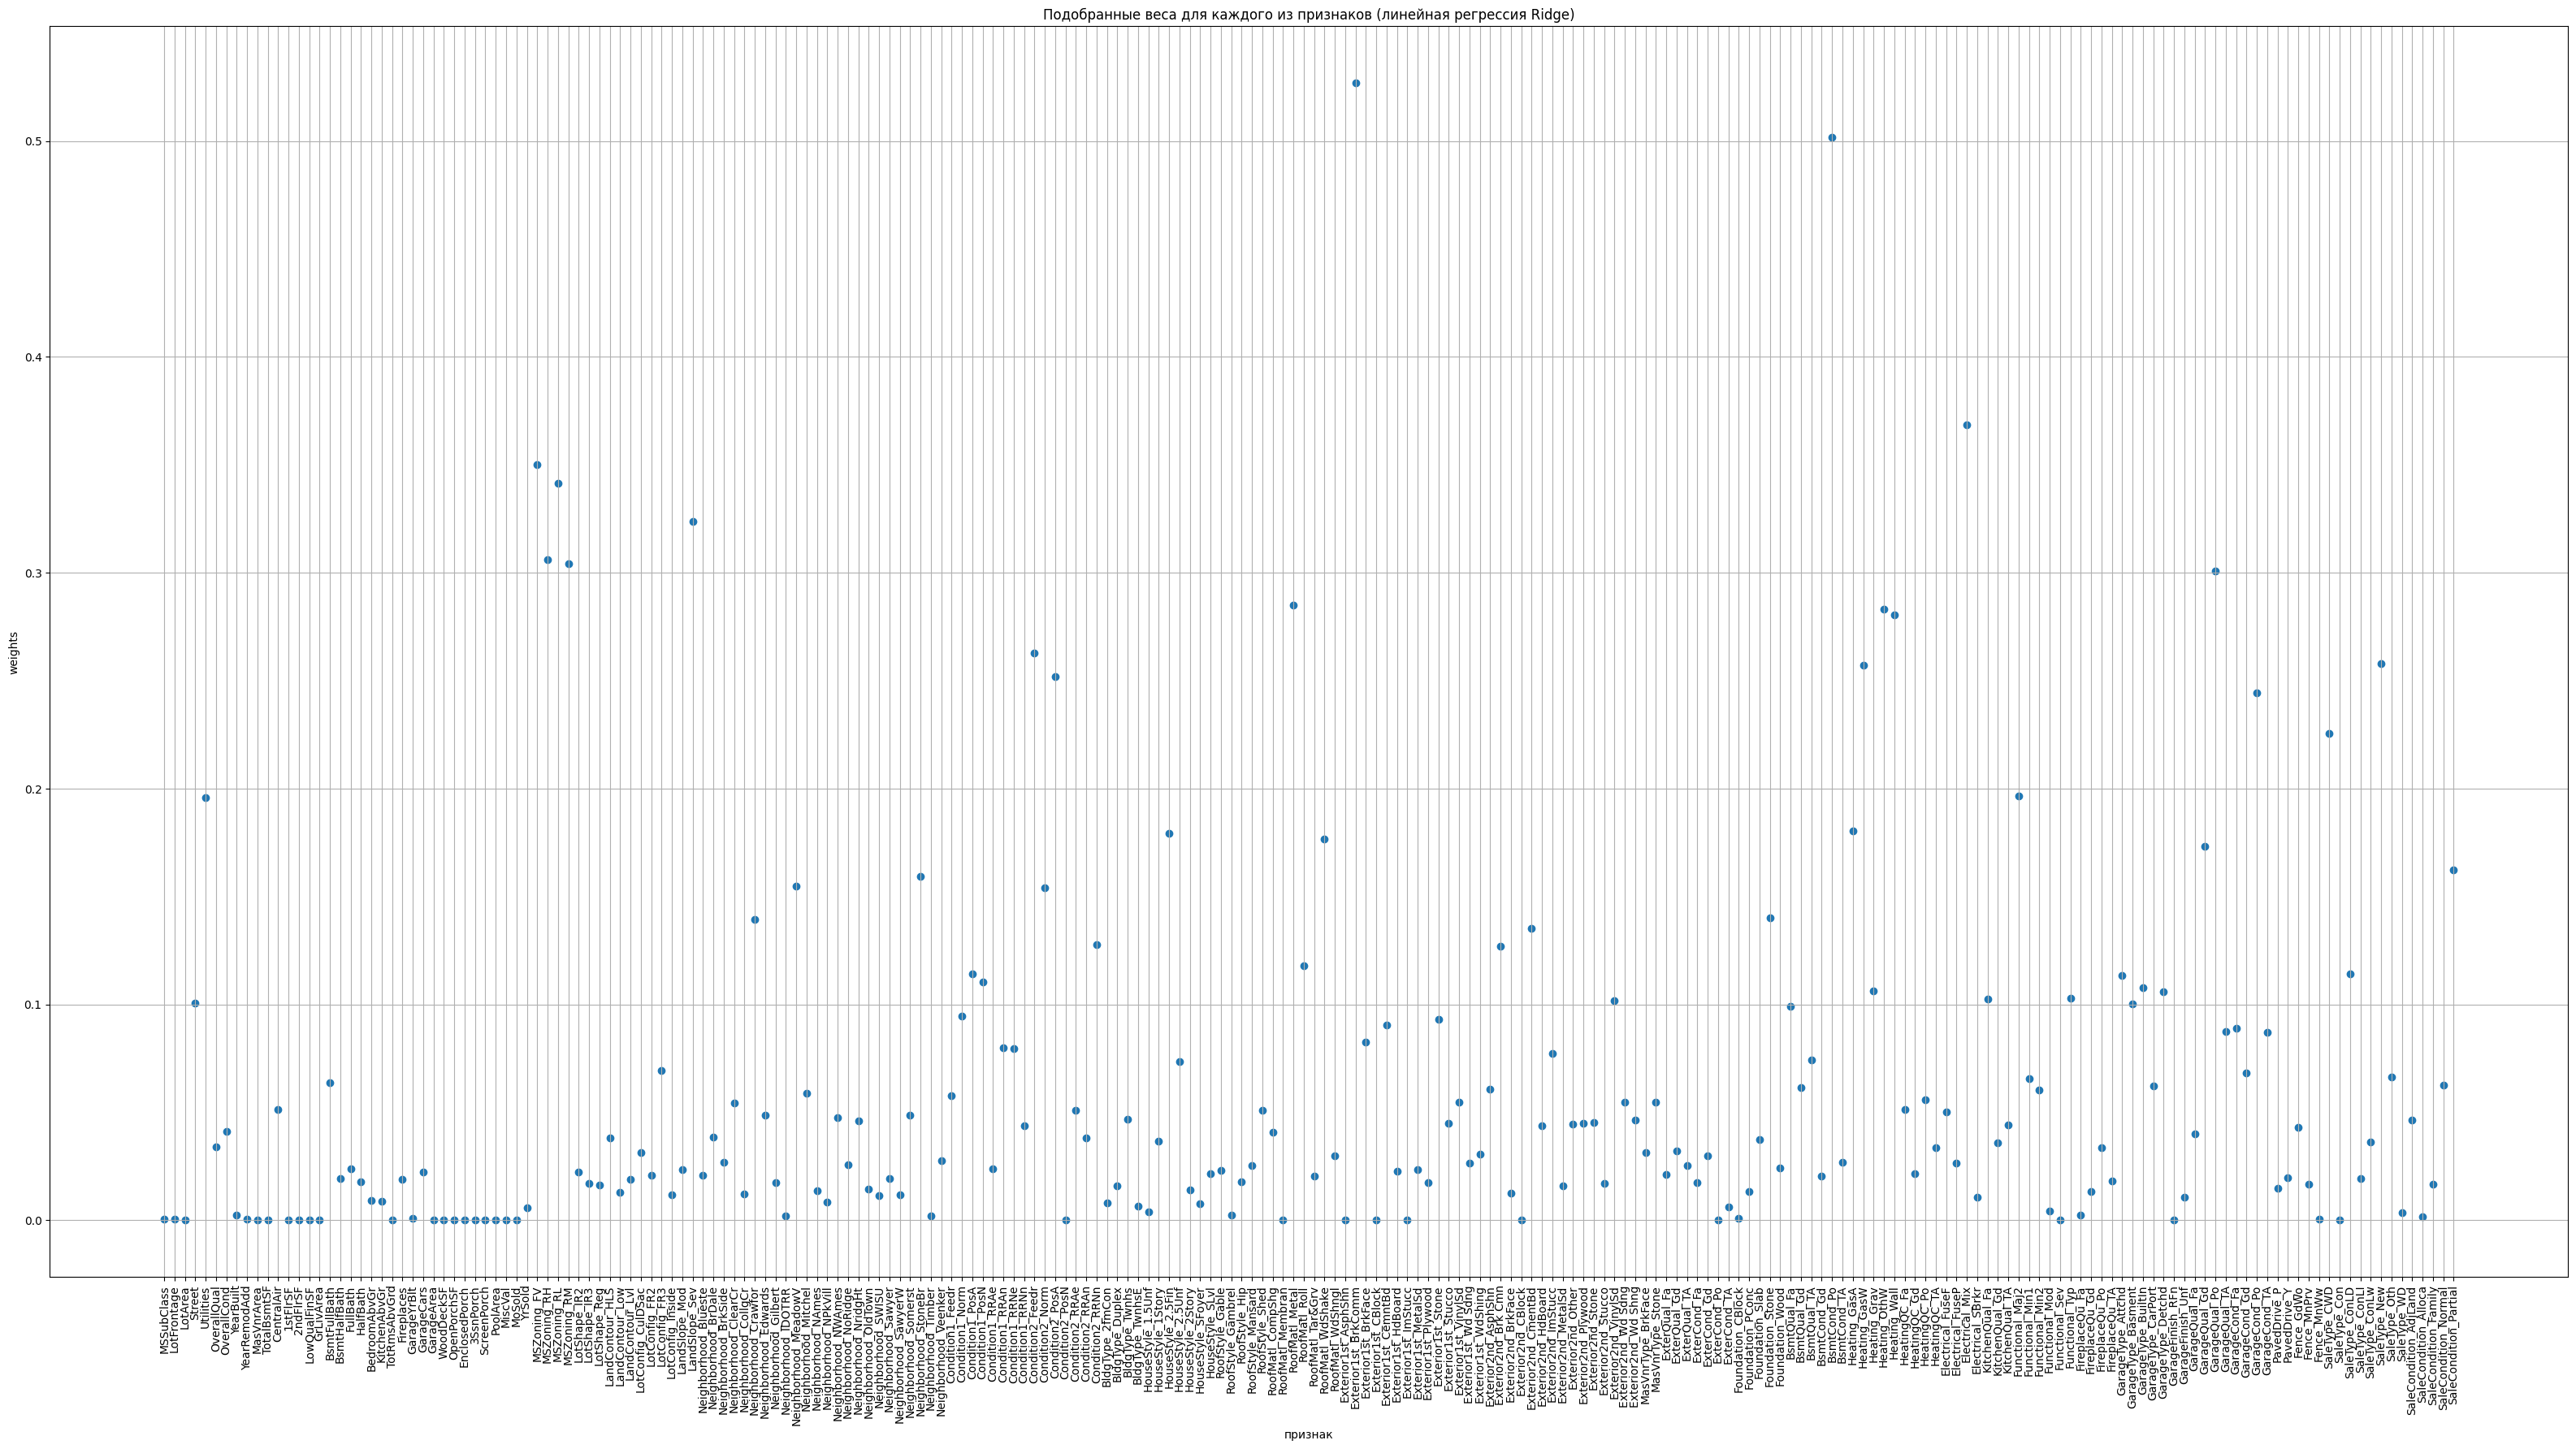

In [123]:
x = X.columns
y = coef_df["coef"].abs()

plt.figure(figsize = (40, 20))

# Функция которая строить точки
plt.scatter(
            x, # значения оси абцисс
            y, # значения оси ординат
            label='correl'
           )

# Подписать график
plt.xticks(rotation=90)
plt.title('Подобранные веса для каждого из признаков (линейная регрессия Ridge)')
# Подписать оси
plt.xlabel('признак')
plt.ylabel('weights')
# Показать сетку
plt.grid()
# показать ВСЕ созданные рисунки
plt.show()

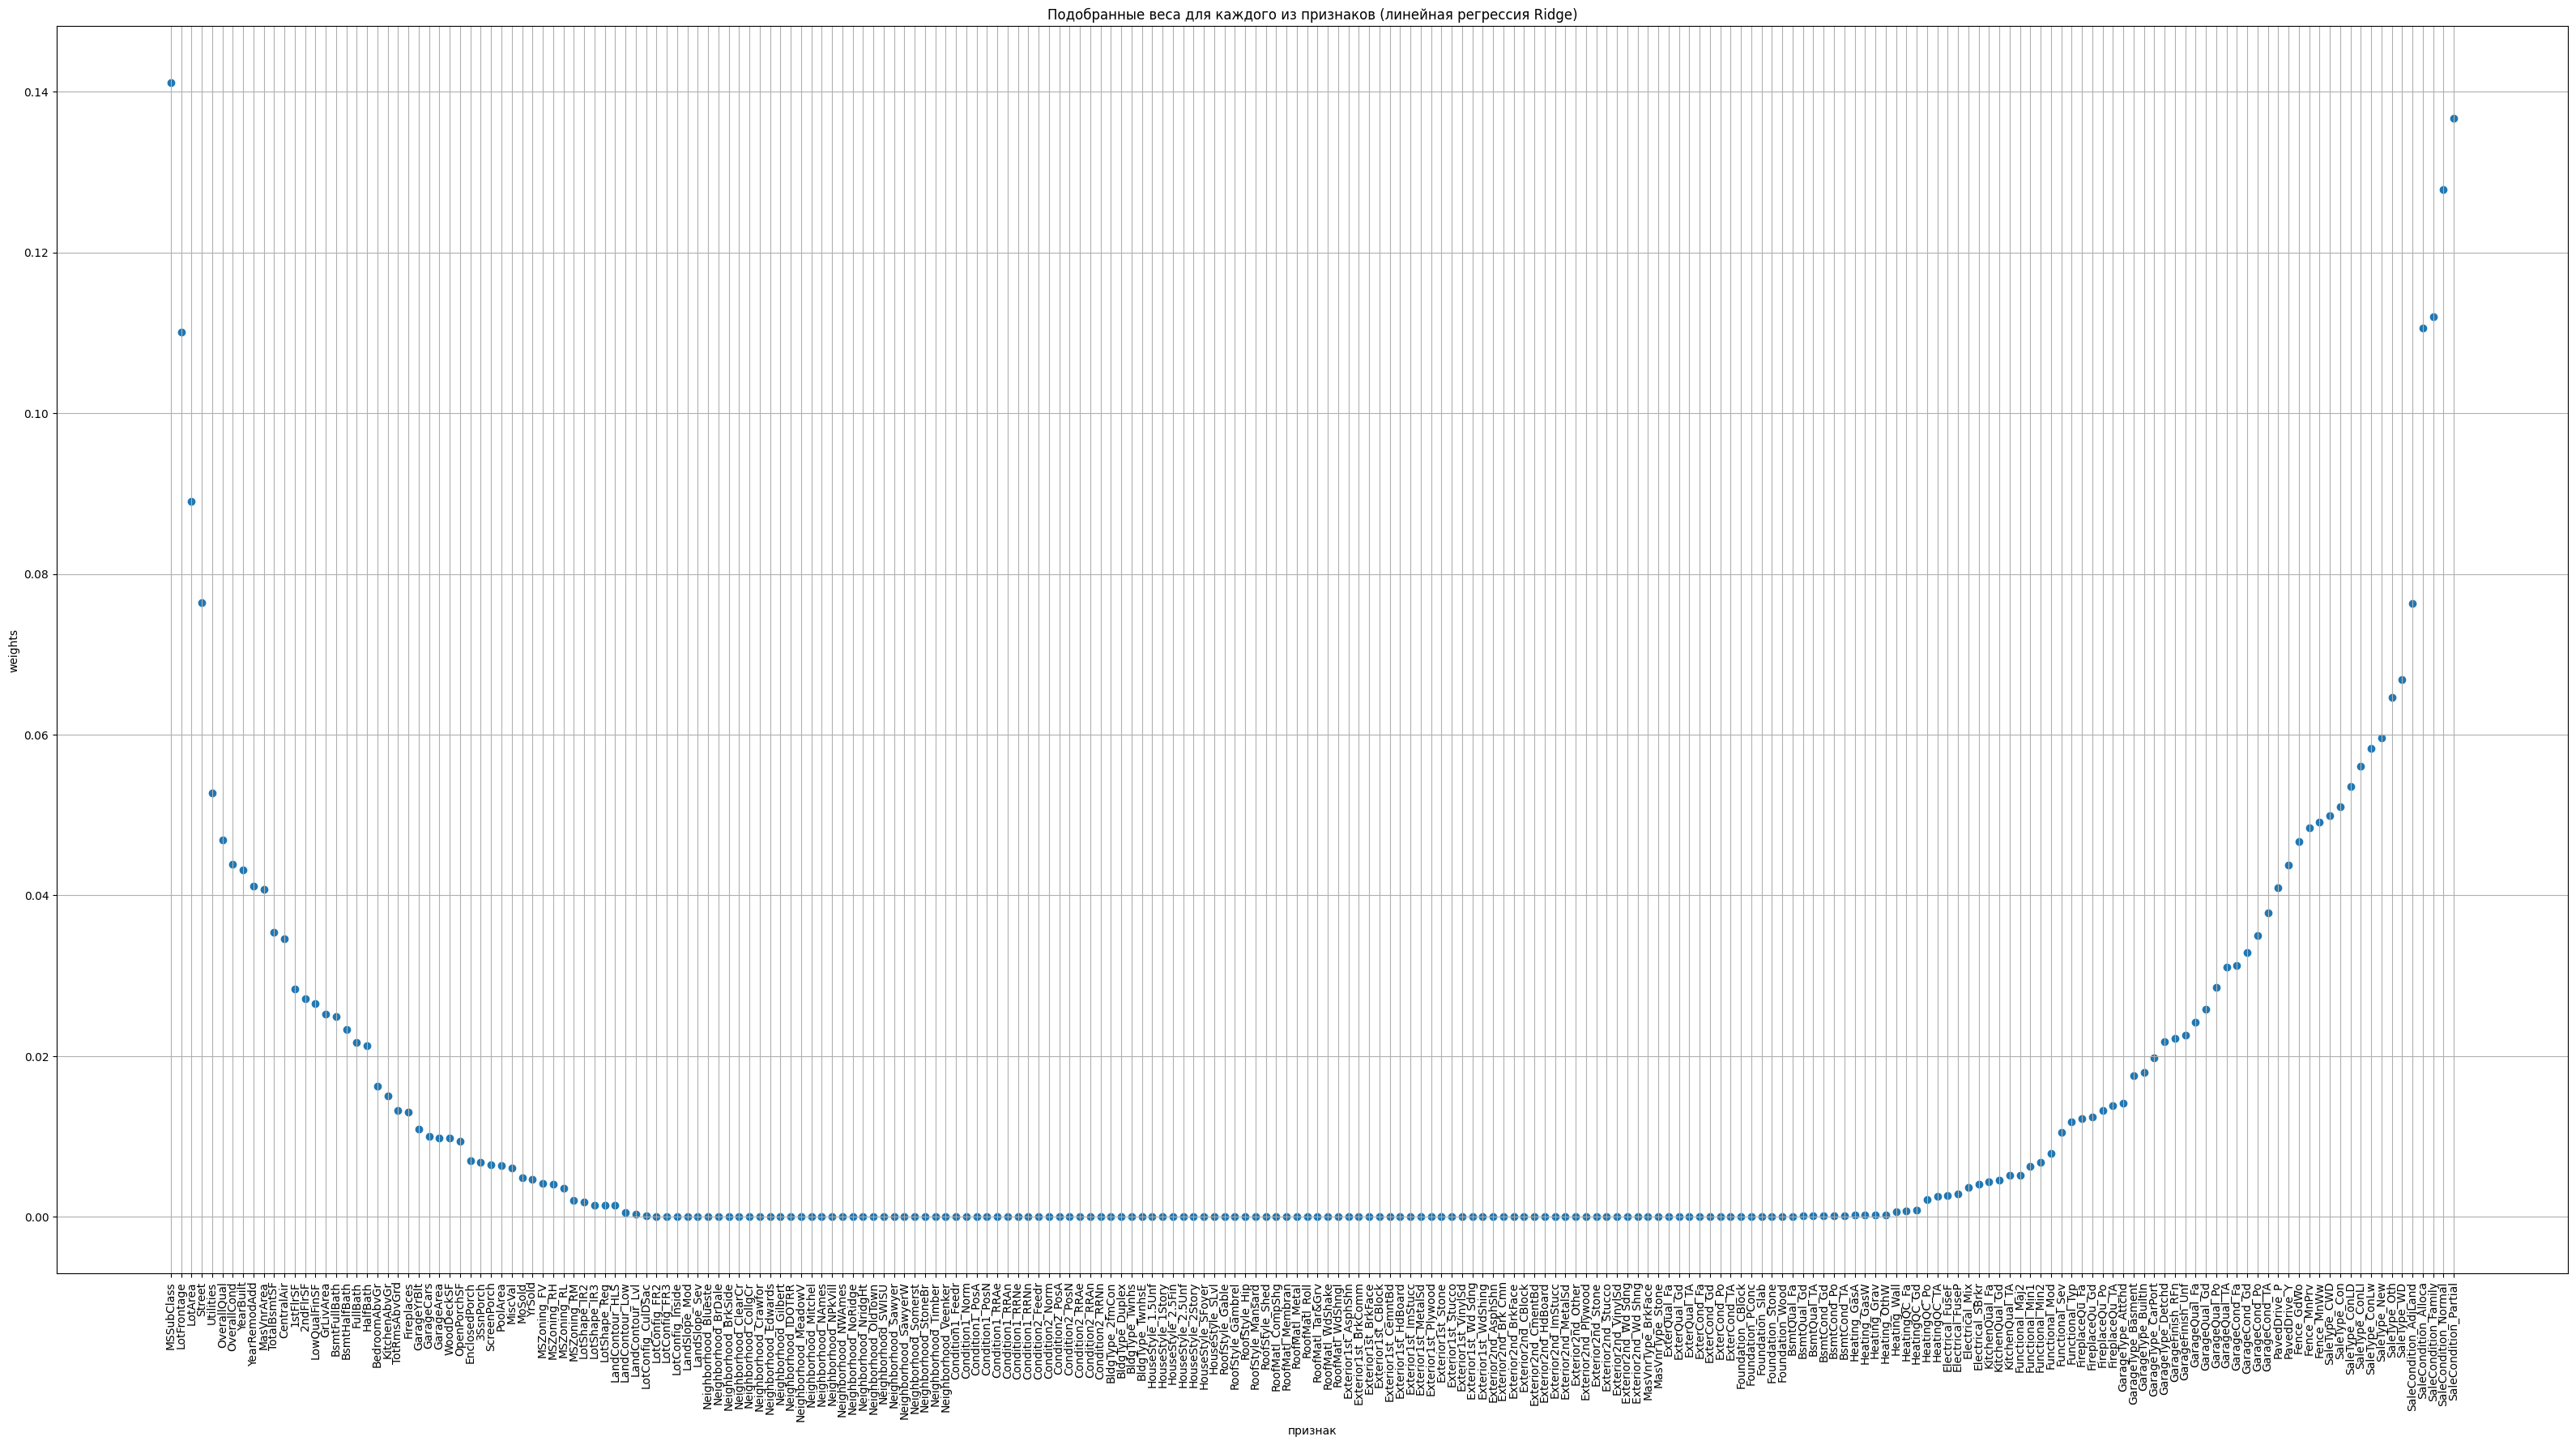

In [124]:
x = X.columns
y = coef_lasso_cv["coef_lasso"].abs()

plt.figure(figsize = (40, 20))

# Функция которая строить точки
plt.scatter(
            x, # значения оси абцисс
            y, # значения оси ординат
            label='correl'
           )

# Подписать график
plt.xticks(rotation=90)
plt.title('Подобранные веса для каждого из признаков (линейная регрессия Ridge)')
# Подписать оси
plt.xlabel('признак')
plt.ylabel('weights')
# Показать сетку
plt.grid()
# показать ВСЕ созданные рисунки
plt.show()

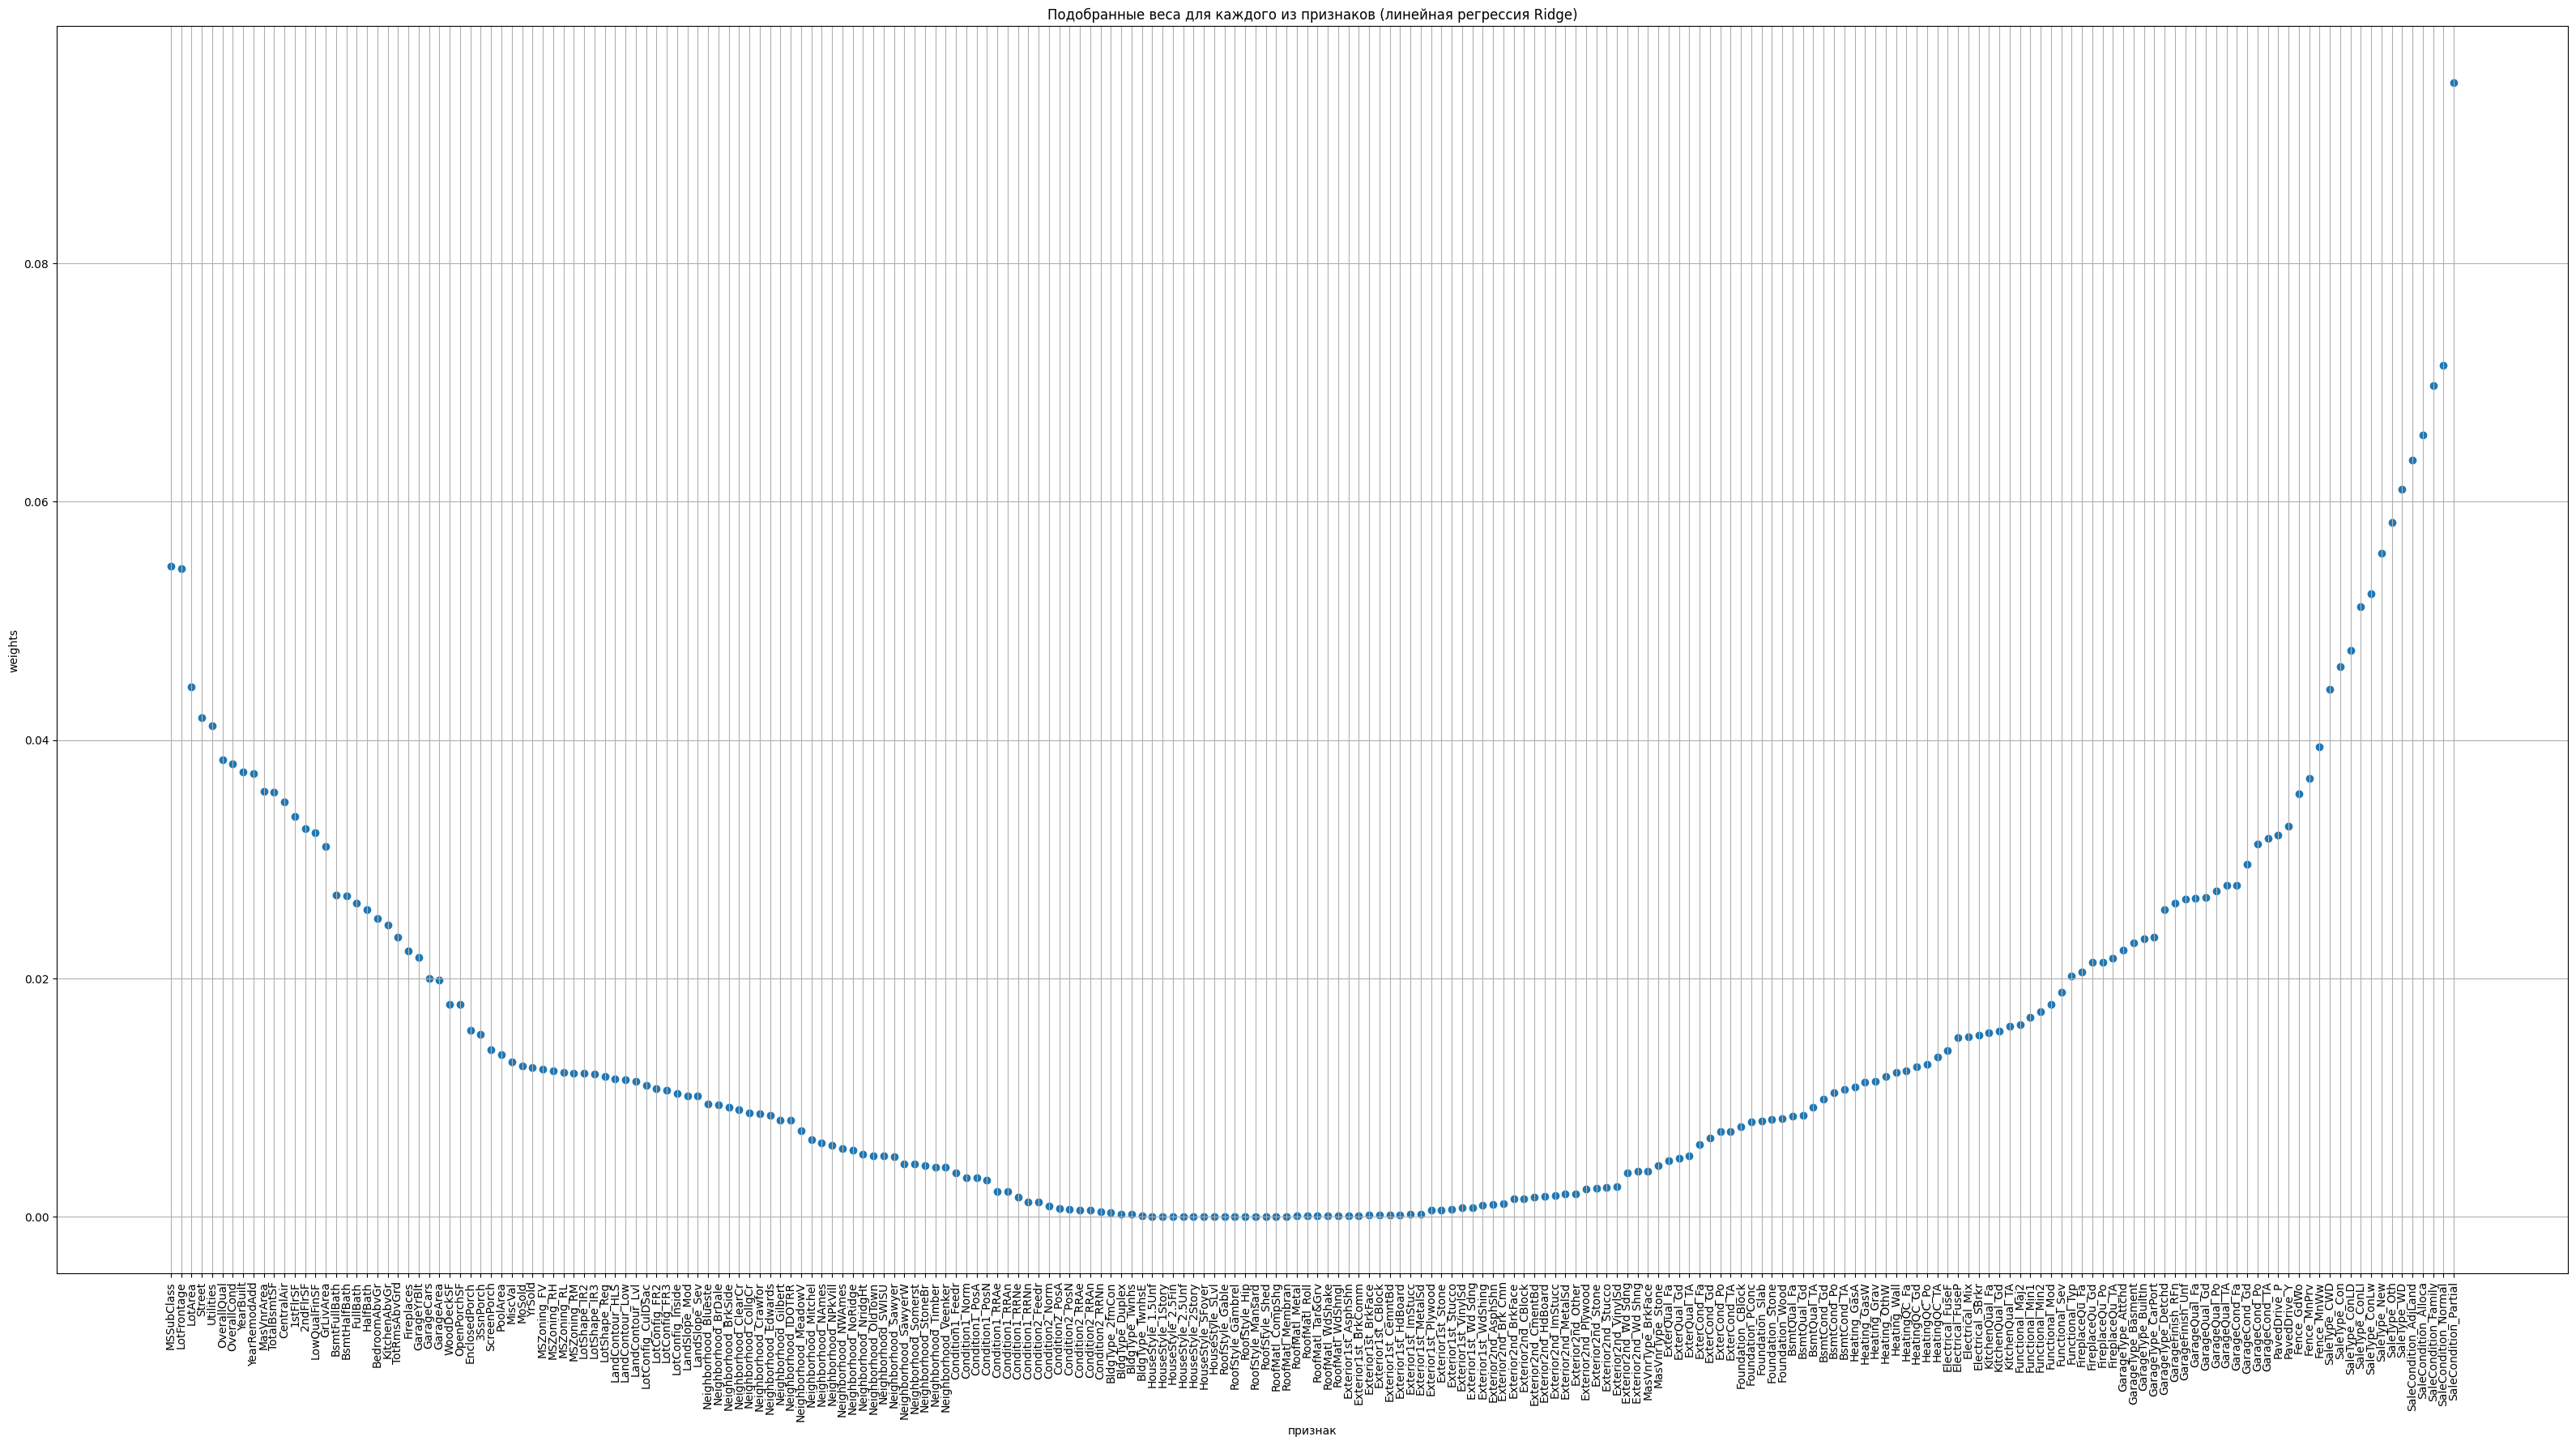

In [125]:
x = X.columns
y = coef_ridge_cv["coef_lasso"].abs()

plt.figure(figsize = (40, 20))

# Функция которая строить точки
plt.scatter(
            x, # значения оси абцисс
            y, # значения оси ординат
            label='correl'
           )

# Подписать график
plt.xticks(rotation=90)
plt.title('Подобранные веса для каждого из признаков (линейная регрессия Ridge)')
# Подписать оси
plt.xlabel('признак')
plt.ylabel('weights')
# Показать сетку
plt.grid()
# показать ВСЕ созданные рисунки
plt.show()